---


# The Perceptron 

In this notebook we introduce a specific type of single neuron model called the *perceptron*. 
We will implement and train this model on the iris dataset (which I have stored in a Datasets folder). If you have cloned my Github repository for this course go ahead and get started by running the following code in the cell below.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()


df = pd.read_csv('palmer_penguins.csv')

In [3]:
df=df[["species","bill_length_mm","bill_depth_mm"]]
df=df.query('species != "Adelie"')
df=df.dropna()

y=df.iloc[:,0].values
y=np.where(y == 'Chinstrap',-1,1)

X=df.iloc[:,[1,2]].values

---

The perceptron can take in any number of feature measurments, but for simplicity we focus our attention on just two feature measurements, namely "sepal length" and "sepal width". Moreover, we need to also convert the string names associated with each species to numerical values; for example, map "setosa" species to -1 and "versicolor" species to 1. The following code preproccesses our data into these desired formats. 


---

As mentioned in a previous lecture python classes lecture, python classes store data as class attribute and functions as class methods. This framework is perfect for implementing a single neuron model. Thus, we next write a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method. Please run the following code in the cell below. 


---

In [4]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

        

---

Next we can instantiate an instance of the ```Perceptron``` class and also train this instance over 1000 epochs by running the following code in the cell below. 

---

In [5]:
percep = Perceptron(epochs = 1000)

percep.train(X, y)

---

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features. We can quickly view these predictions on the entries in ```X``` by running the following code in the cell below.

---

In [6]:
y_hat = percep.predict(X)

print(y == y_hat)

[False False False  True False False False False  True False False False
 False False False False  True False  True False  True False False False
 False False False False False False  True False False False False False
 False  True False False  True False False False False False False  True
 False False False False False False  True False False  True False  True
 False False False False  True False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

---

As we can see from the output of the code above, the predicted values have matched the true values on the given data. We can visualize this in the Euclidian plane by calling the ```plot_decision_regions``` function imported at the top of this notebook. This function will scatter the iris data in the plane and also show the regions of space where a given point will be classified either -1 or 1. It super easy to use and I'm glad I found it! Try running the following code in the cell below.


---

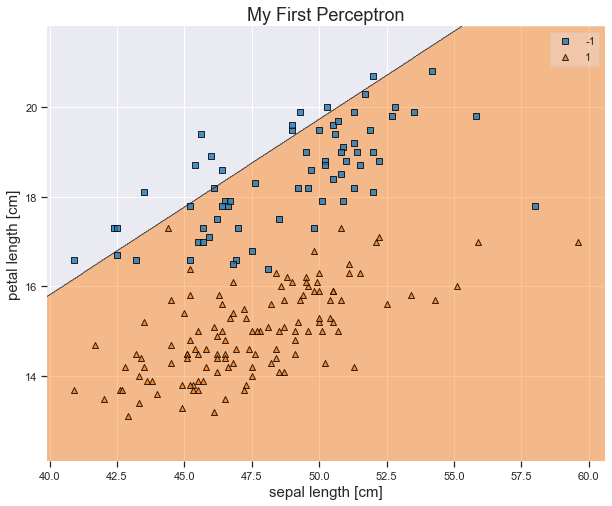

In [7]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("petal length [cm]", fontsize = 15)
plt.show()

---

As you can see from the output of the code above, we have found a nice linear seperator which has classified our data. But how long did our perceptron model train for? Luckily, when we defined our ```Perceptron``` class we stored the error incured by the model at each iteration of an epoch in the ```errors_``` attribute. We can view these errors over each epoch by running the following code in the cell below. 


---

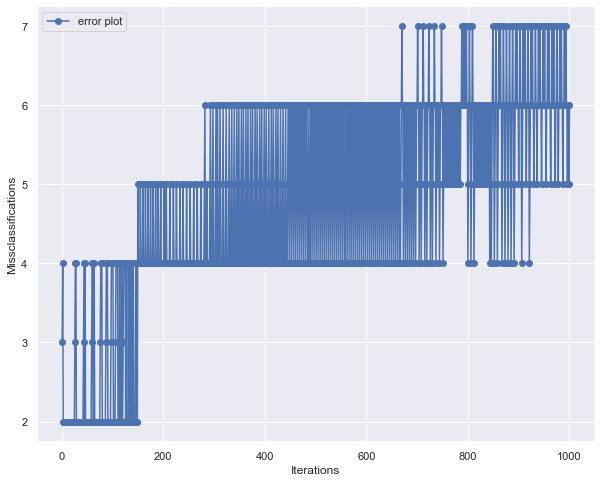

In [8]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()